# Exercise 1 - Data storytelling

## 2. CO2 data storytelling

In [45]:
import pandas as pd

df = pd.read_csv("data/co2_annmean_mlo.csv",skiprows=43)
df.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [46]:
df.columns

Index(['year', 'mean', 'unc'], dtype='object')

In [47]:
df = df.drop('unc', axis=1)
df['year'] = df['year'].astype(int)
df['mean'] = df['mean'].astype(int)

In [48]:
df.set_index('year')

,mean
year,
1959,315
1960,316
1961,317
1962,318
1963,318
...,...
2019,411
2020,414
2021,416


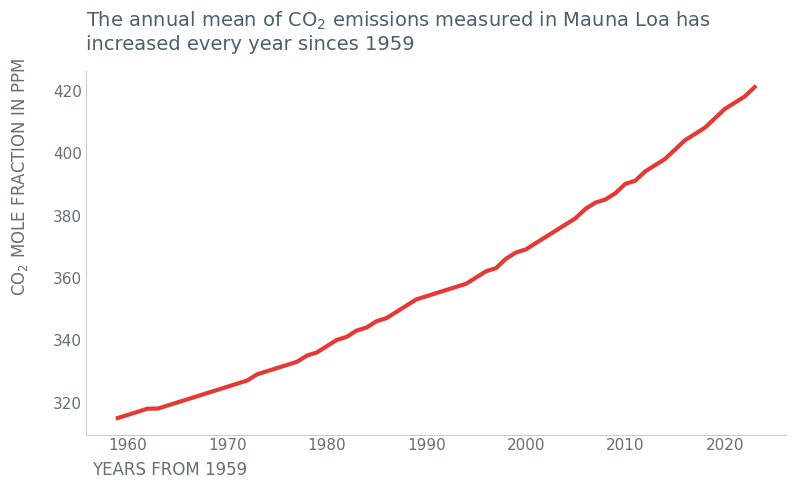

In [73]:
import matplotlib.pyplot as plt
from constants import GRAY_1, GRAY_2, GRAY_3, RED_1

# Plot
fig, ax = plt.subplots(figsize=(8, 5))


# Plot the original data
ax.plot(df["year"], df["mean"] , color=RED_1, linewidth = 3)


# remove clutter: top spine and right spine. 
ax.spines[['top', 'right']].set_visible(False)

#  left align the title
ax.set_title( 
    r"The annual mean of $\mathrm{CO_2}$ emissions measured in Mauna Loa has" + "\nincreased every year sinces 1959 ", 
    loc="left",
    fontsize=14,
    color = GRAY_3, 
    pad=15
)

# Left align the xlabel
ax.set_xlabel("YEARS FROM 1959", color=GRAY_2, fontsize=12) # possible add on:  fontweight= "bold"
ax.xaxis.set_label_coords(0.12, -0.07)

# top align the ylabel
ax.set_ylabel(r"$\mathrm{CO_2}$ MOLE FRACTION IN PPM", color=GRAY_2, fontsize=12, rotation=90)
ax.yaxis.set_label_coords(-0.08, 0.71)

# contrast
ax.spines[['bottom', 'left']].set_color(GRAY_1)

ax.tick_params(
    axis="both", 
    colors = GRAY_2, 
    labelsize = 11, 
    length = 0,
    pad = 2
    )
ax.tick_params(axis= "y", pad = 3)

# remove minor ticks
ax.minorticks_off()   

fig.tight_layout()
fig.savefig("figures/co2_emissions_Mauna.png" ,dpi=300)